In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import pandas as pd

In [28]:
df = pd.read_csv("./lambdas", sep=' ', names=['lambda', 't', 'time', 'score'])

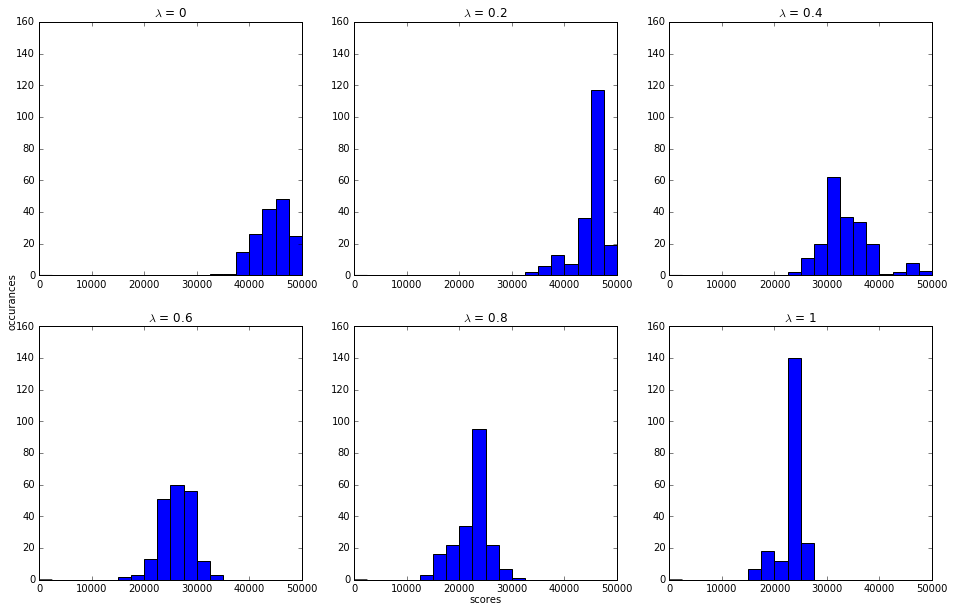

In [114]:
# Plot histograms of scores
fig = plt.figure(figsize=(16,10))

ax = fig.add_subplot(111)
ax.set_xlabel('scores')
ax.set_ylabel('occurances')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.tick_params(axis='x', pad=10)
ax.tick_params(axis='y', pad=17)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
# ax.axis('off')


for i, l in enumerate([0,0.2,0.4,0.6,0.8,1]):
	axes = fig.add_subplot(2,3,i+1)
	# fig = plt.figure()
	bins = 20
	maxscore = 50000
	binwidth = maxscore / bins
	# axes = plt.gca()
	data = df[df['lambda'] == l]
	axes.set_xlim([0,maxscore])
	axes.set_ylim([0,160])
	axes.set_title(r'$\lambda$ = {}'.format(l))
	# plt.xlabel('score')
	# plt.ylabel('occurances')
	# axes.hist(data['score'], bins=10)
	axes.hist(data['score'], bins=range(0, maxscore + binwidth, binwidth))

plt.show()
fig.savefig("./figures/scores.png")

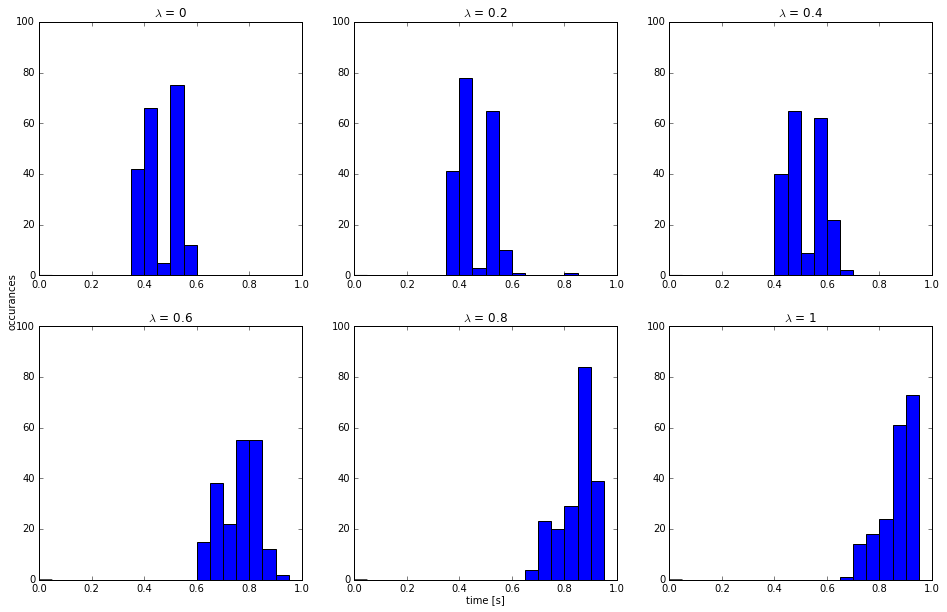

In [116]:
# Plot histograms of times
fig = plt.figure(figsize=(16,10))

ax = fig.add_subplot(111)
ax.set_xlabel('time [s]')
ax.set_ylabel('occurances')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.tick_params(axis='x', pad=10)
ax.tick_params(axis='y', pad=17)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid(False)
# ax.axis('off')

for i, l in enumerate([0,0.2,0.4,0.6,0.8,1]):
	bins = 20
	maxtime = 1
	binwidth = float(maxtime) / bins
	axes = fig.add_subplot(2,3,i+1)
	axes.set_xlim([0,maxtime])
	axes.set_ylim([0,100])
	axes.set_title(r'$\lambda$ = {}'.format(l))
	data = df[df['lambda'] == l]
	data = data[data['time'] <= maxtime]
	# axes.set_xlable('iters')
	# axes.set_ylable('score')
	# times, bins = pd.cut(df['time'], 100)
	# weights = np.ones_like(data['time'])/float(len(data['time']))
	# axes.hist(data['time'], bins=range(0, maxscore + binwidth, binwidth))
	axes.hist(data['time'], bins=[x*binwidth for x in range(0,bins)])

plt.show()
fig.savefig("figures/time.png")

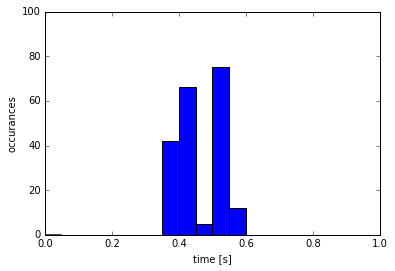

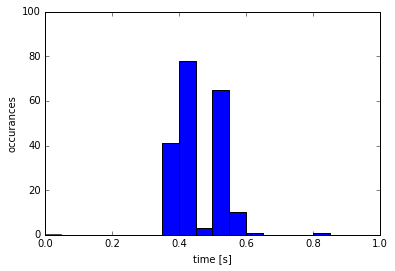

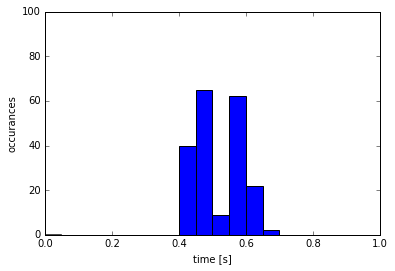

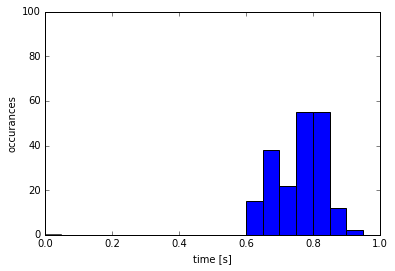

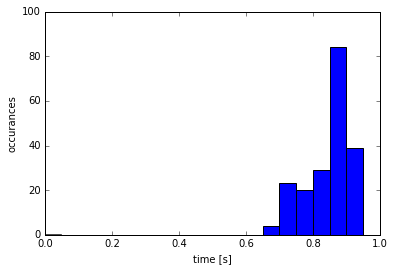

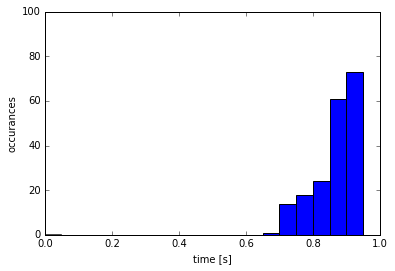

In [83]:
# Plot histograms of times
# fig = plt.figure(figsize=(16,10))
for i, l in enumerate([0,0.2,0.4,0.6,0.8,1]):
	fig = plt.figure()
	bins = 20
	maxtime = 1
	binwidth = float(maxtime) / bins
	axes = plt.gca()
	axes.set_xlim([0,maxtime])
	axes.set_ylim([0,100])
	data = df[df['lambda'] == l]
	data = data[data['time'] <= maxtime]
	axes.set_xlabel('time [s]')
	axes.set_ylabel('occurances')
	axes.hist(data['time'], bins=[x*binwidth for x in range(0,bins)])
	plt.show()
	fig.savefig("./figures/time_{}.png".format(i))

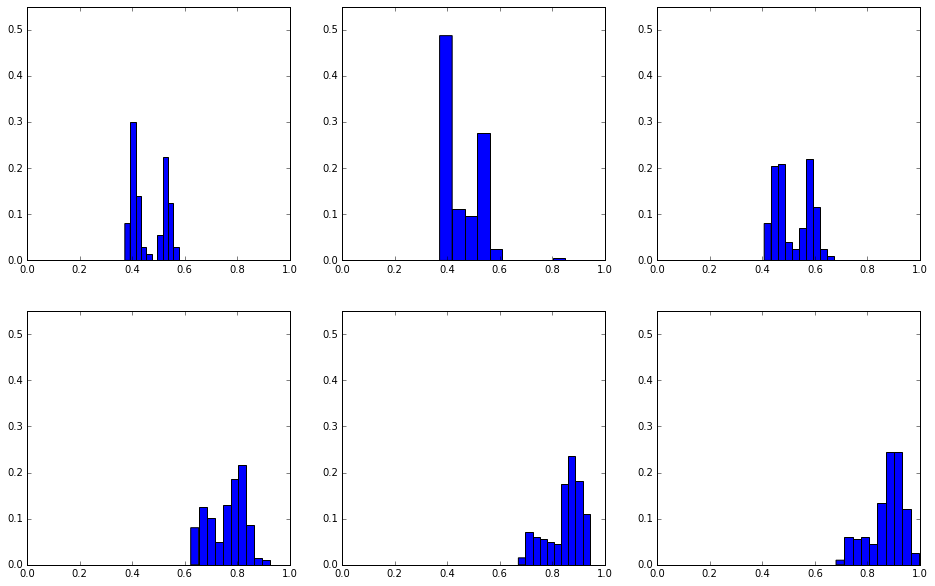

In [61]:
# Plot histograms of times
fig = plt.figure(figsize=(16,10))
for i, l in enumerate([0,0.2,0.4,0.6,0.8,1]):
	axes = fig.add_subplot(2,3,i+1)
	axes.set_xlim([0,1])
	axes.set_ylim([0,0.55])
	data = df[(df['lambda'] == l)]
	data = data[(data['time'] <= 1)]
	weights = np.ones_like(data['time'])/float(len(data['time']))
	axes.hist(data['time'], bins=10, weights=weights)
	
plt.show()

In [127]:
print
print("Score")
print("Name \t Mean \t \t Median \t \t Variance")
for i, l in enumerate([0,0.2,0.4,0.6,0.8,1]):
	print("{} \t {:.2f} \t {:.2f} \t {:.2f}".format(l, df[df['lambda'] == l]['score'].mean(),
	                                    df[df['lambda'] == l]['score'].median(), df[df['lambda'] == l]['score'].var()))
	
print
print("Time / Iteration")
print("Name \t Mean \t \t Median \t \t Variance")
for i, l in enumerate([0,0.2,0.4,0.6,0.8,1]):
	print("{} \t {:.2e} \t {:.2e} \t {:.2e}".format(l, (df[df['lambda'] == l]['time']/20).mean(),
	                (df[df['lambda'] == l]['time']/20).median(), (df[df['lambda'] == l]['time']/20).var()))


Score
Name 	 Mean 	 	 Median 	 	 Variance
0 	 46097.84 	 46532.77 	 20327896.70
0.2 	 45318.20 	 46778.22 	 9623616.19
0.4 	 33738.25 	 32591.80 	 23797530.67
0.6 	 26042.11 	 26473.71 	 8963460.47
0.8 	 22663.24 	 23149.05 	 9931249.23
1 	 22983.60 	 23414.85 	 4876972.44

Time / Iteration
Name 	 Mean 	 	 Median 	 	 Variance
0 	 2.31e-02 	 2.13e-02 	 1.02e-05
0.2 	 2.30e-02 	 2.11e-02 	 1.57e-05
0.4 	 2.58e-02 	 2.45e-02 	 1.16e-05
0.6 	 3.82e-02 	 3.89e-02 	 1.83e-05
0.8 	 4.24e-02 	 4.32e-02 	 1.22e-05
1 	 4.36e-02 	 4.45e-02 	 1.05e-05


In [131]:
print
print("Score")
print("Name \t Mean \t \t Median \t \t Variance")
for i, l in enumerate([0,0.2,0.4,0.6,0.8,1]):
	print("{} & {:.2f} & {:.2f} & {:.2f} \\\\".format(l, df[df['lambda'] == l]['score'].mean(),
	                                    df[df['lambda'] == l]['score'].median(), df[df['lambda'] == l]['score'].var()))
	
print
print("Time / Iteration")
print("Name \t Mean \t \t Median \t \t Variance")
for i, l in enumerate([0,0.2,0.4,0.6,0.8,1]):
	print("{} & {:.2e} $s$ & {:.2e} $s$ & {:.2e} $s^2$ \\\\".format(l, (df[df['lambda'] == l]['time']/20).mean(),
	                (df[df['lambda'] == l]['time']/20).median(), (df[df['lambda'] == l]['time']/20).var()))


Score
Name 	 Mean 	 	 Median 	 	 Variance
0 & 46097.84 & 46532.77 & 20327896.70 \\
0.2 & 45318.20 & 46778.22 & 9623616.19 \\
0.4 & 33738.25 & 32591.80 & 23797530.67 \\
0.6 & 26042.11 & 26473.71 & 8963460.47 \\
0.8 & 22663.24 & 23149.05 & 9931249.23 \\
1 & 22983.60 & 23414.85 & 4876972.44 \\

Time / Iteration
Name 	 Mean 	 	 Median 	 	 Variance
0 & 2.31e-02 $s$ & 2.13e-02 $s$ & 1.02e-05 $s^2$ \\
0.2 & 2.30e-02 $s$ & 2.11e-02 $s$ & 1.57e-05 $s^2$ \\
0.4 & 2.58e-02 $s$ & 2.45e-02 $s$ & 1.16e-05 $s^2$ \\
0.6 & 3.82e-02 $s$ & 3.89e-02 $s$ & 1.83e-05 $s^2$ \\
0.8 & 4.24e-02 $s$ & 4.32e-02 $s$ & 1.22e-05 $s^2$ \\
1 & 4.36e-02 $s$ & 4.45e-02 $s$ & 1.05e-05 $s^2$ \\
